C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

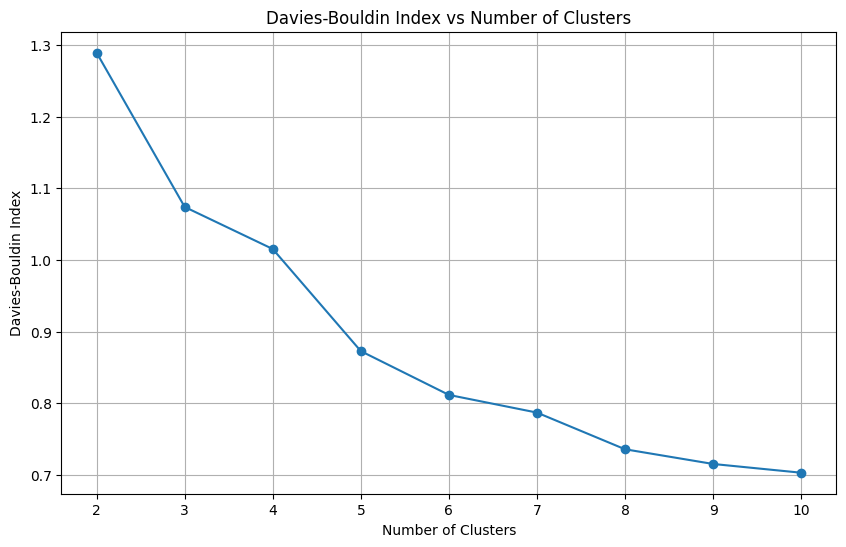

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


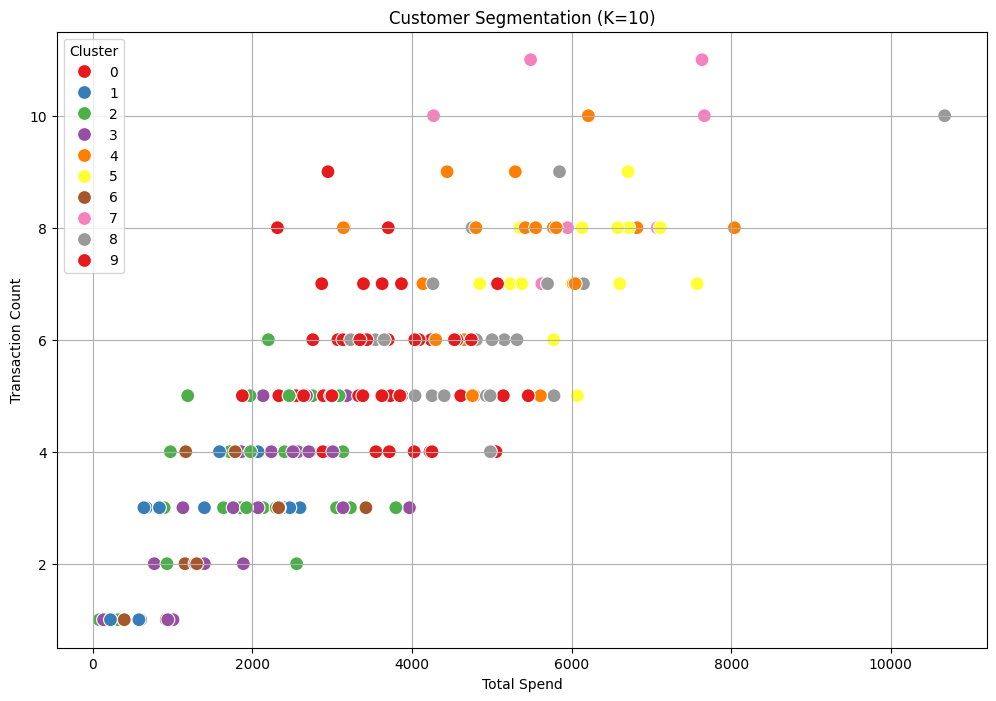

Clustering and visualization completed successfully.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# Load the datasets
customers = pd.read_csv(r"C:\Users\DELL\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\DELL\Downloads\Transactions.csv")

# Data Preparation
# Merge datasets on CustomerID
merged_data = transactions.merge(customers, on='CustomerID')

# Create features for clustering
# Aggregate transaction data to get total spend and transaction count per customer
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()

# Rename columns for clarity
customer_features.columns = ['CustomerID', 'TotalSpend', 'TransactionCount']

# Add customer profile information (e.g., region)
customer_profiles = customers[['CustomerID', 'Region']]
customer_features = customer_features.merge(customer_profiles, on='CustomerID')

# One-hot encode categorical variables
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

# Clustering
# Determine optimal number of clusters (2 to 10)
db_indexes = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    db_index = davies_bouldin_score(scaled_features, labels)
    db_indexes.append(db_index)

# Plot DB Index vs Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), db_indexes, marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

# Choose optimal number of clusters (e.g., based on lowest DB Index)
optimal_clusters = np.argmin(db_indexes) + 2  # +2 because range starts at 2

# Fit KMeans with optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans_optimal.fit_predict(scaled_features)

# Visualization of Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_features, x='TotalSpend', y='TransactionCount', hue='Cluster', palette='Set1', s=100)
plt.title(f'Customer Segmentation (K={optimal_clusters})')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster')
plt.grid()
plt.show()

print("Clustering and visualization completed successfully.")
